# Non-Maximum Suppression algorithm


In the last lesson, we made an incredible R-CNN model and trained it to detect airplanes on a field, but as good the results were, we had some issues with them. One being sometimes boxes overlap for the same part of the image. 

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/07/graphic4.jpg)
<center>Image taken from <a href="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/07/graphic4.jpg">here</a></center>

In this lesson, we solve that issue and make our predictions better.

**Non-Maximum Suppression** is a technique that checks predicted bounding boxes that overlap and merges them to see only the correct one or one with the highest prediction score. 

Let's check the theory behind NMS.


### Steps:
1. Implement NMS algorithm

### Topics covered and learning objectives
- Non-Maximum Suppression

### Time estimates:
- Reading/Watching materials: 15min
- Exercises: 10min
<br><br>
- **Total**: ~25h


In [1]:
from IPython.display import IFrame

In [2]:
IFrame("https://www.youtube.com/embed/VAo84c1hQX8", 1000, 500)

**In some cases, IPython widgets do not work!**

If this is the case here is the like for YouTube video from cell above: https://www.youtube.com/embed/VAo84c1hQX8


<br>

After this video read through this blog https://www.analyticsvidhya.com/blog/2020/08/selecting-the-right-bounding-box-using-non-max-suppression-with-implementation/


## Import dependencies

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from utils import IoU

### Exercise 1: Complete the non_max_suppression function

Following the instructions given at certain lines, complete the **non_max_suppression** function. The test data is provided for you, so you can test your implementation if it works.

In [4]:
def non_max_suppression(bounding_boxes, 
                       model_scores, 
                       threshold=0.5):
    """
    NMS Algorithm, takes multiple bounding boxes with their scores and outputs the most probable one.
    
    Args:
        :param bounding_boxes (np.array): array of dictionaries -  np.array([{"x1":248, "y1":42, "x2":524, "y2":242}, 
                                                                           {"x1":220, "y1":60, "x2":500, "y2":220}, 
                                                                           {"x1":260, "y1":30, "x2":590, "y2":250}])
        
        :param model_score (np.array): array of probs generated by the model - np.array([0.9, 0.75, 0.8])
        :param threshold (int): minimum overlap to consider that bounding boxes overlapped
    """
    resulting_boxes = []
    resulting_scores = []
    
    if len(bounding_boxes) == 0:
        return resulting_boxes, resulting_scores
    
    
    # Sort the arguments based on the model score, in the decending order
    # Example: model_score=[0.9, 0.75, 0.8] -> ids=[0, 2, 1]
    # YOUR CODE HERE
    ids = np.argsort(model_scores)[::-1]
    
    
    while ids.size > 0:
        _id = ids[0]
        
        # Append the _id element from bounding_boxes and model_scores into respective resulting lists
        # YOUR CODE HERE
        resulting_boxes.append(bounding_boxes[_id])
        resulting_scores.append(model_scores[_id])
        
        resulting_ids = []
        for i in range(1, len(ids)):
            
            # Calculate IoU between _id bounding box and I-th bounding box
            # YOUR CODE HERE
            iou = IoU(bounding_boxes[_id], bounding_boxes[ids[i]])
            # Check if iou is below defined threshold, if YES append ids[i] to the resulting_ious
            # YOUR CODE HERE
            if iou < threshold:
                resulting_ids.append(i)
    
        ids = ids[resulting_ids]
        
    return resulting_boxes, resulting_scores

### Define some test data to check if NMS works

In [36]:
bounding_boxes = np.array([{"x1":248, "y1":42, "x2":524, "y2":242}, 
                           {"x1":220, "y1":60, "x2":500, "y2":220}, 
                           {"x1":260, "y1":30, "x2":590, "y2":250}])
confidence_score = np.array([0.9, 0.75, 0.8])

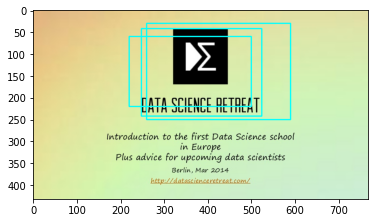

In [37]:
test_img = cv2.imread("images/nms.jpg")
for bbox in bounding_boxes:
    cv2.rectangle(test_img, (bbox['x1'], bbox['y1']), (bbox['x2'], bbox['y2']), (0, 255, 255), 2)
    
plt.imshow(test_img)

### Calling non_max_suppression on test data

In [38]:
nms_boxes, scores = non_max_suppression(bounding_boxes, confidence_score)

### Visualizing the results

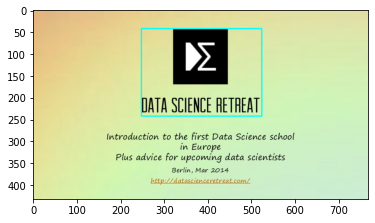

In [39]:
test_img = cv2.imread("images/nms.jpg")
for bbox in nms_boxes:
    cv2.rectangle(test_img, (bbox['x1'], bbox['y1']), (bbox['x2'], bbox['y2']), (0, 255, 255), 2)
    
plt.imshow(test_img)